In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df=pd.read_csv('/content/2015_16_Statewise_Elementary.csv')

In [3]:
df.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,1436,2127,...,0,0,0,0,0,0,665604,61070,167781,486933,44904,123864,321576,34985,65079,229227,25588,47051,1933,1428,3361,816,530,1346,75,22,97,915,61,2173,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,610,793,...,0,0,0,0,0,0,329673,122825,20439,319435,119118,19561,300370,113339,22577,332815,116201,23289,1316,918,2234,85,94,179,14,14,28,521,386,442,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14371,2582,2593,2864,1754,2743,1869,0,28776,13250,328,309,2858,1631,283,1829,0,20488,921,1916,...,389,0,0,0,89,0,1168711,755477,1043,1002514,717693,983,911360,582104,1374,637313,450571,1091,2321,4034,6355,1479,2277,3756,260,455,715,3687,1241,3668,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,29,85,0,5,70,0,0,201,7,12,42,0,2,52,0,0,115,4,12,...,0,0,0,0,0,0,59945,6520,46,57242,6330,34,44236,6456,25,42094,6330,27,43,275,318,37,143,180,7,24,31,0,0,147,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15497,1584,487,3433,1600,164,895,0,23660,12599,17,46,2806,1245,9,783,0,17505,2654,1457,...,0,1304,0,0,0,0,477117,165623,13868,423433,158811,12398,313326,103971,10992,243224,85782,9204,2253,1220,3473,2263,1205,3468,798,360,1158,1945,786,1956,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [4]:
df.shape

(36, 816)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 816 entries, AC_YEAR to TOTCLS7G
dtypes: float64(8), int64(806), object(2)
memory usage: 229.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STATCD,36.0,18.500000,10.535654,1.0,9.75,18.5,27.25,36.0
DISTRICTS,36.0,18.888889,15.947732,1.0,8.00,13.5,27.75,75.0
BLOCKS,36.0,203.250000,220.756928,1.0,35.75,135.5,306.25,971.0
VILLAGES,36.0,16520.500000,21166.739773,10.0,1038.50,8686.0,23341.00,98470.0
CLUSTERS,36.0,2289.833333,2645.161756,7.0,121.50,1575.5,3865.00,10594.0
...,...,...,...,...,...,...,...,...
TOTCLS3G,36.0,14434.027778,23541.908405,0.0,1383.75,5211.5,15784.50,120330.0
TOTCLS4G,36.0,16978.833333,52698.821185,0.0,37.50,560.0,8825.50,297150.0
TOTCLS5G,36.0,7392.222222,16163.813519,0.0,180.25,733.0,5571.75,78017.0
TOTCLS6G,36.0,13556.166667,17501.644852,0.0,1832.50,6415.0,21242.50,86126.0


In [7]:
df.dtypes

AC_YEAR      object
STATCD        int64
STATNAME     object
DISTRICTS     int64
BLOCKS        int64
              ...  
TOTCLS3G      int64
TOTCLS4G      int64
TOTCLS5G      int64
TOTCLS6G      int64
TOTCLS7G      int64
Length: 816, dtype: object

In [8]:
df.isnull().sum()

AC_YEAR      0
STATCD       0
STATNAME     0
DISTRICTS    0
BLOCKS       0
            ..
TOTCLS3G     0
TOTCLS4G     0
TOTCLS5G     0
TOTCLS6G     0
TOTCLS7G     0
Length: 816, dtype: int64

In [9]:
df.nunique()

AC_YEAR       1
STATCD       36
STATNAME     36
DISTRICTS    23
BLOCKS       35
             ..
TOTCLS3G     36
TOTCLS4G     34
TOTCLS5G     36
TOTCLS6G     36
TOTCLS7G     31
Length: 816, dtype: int64

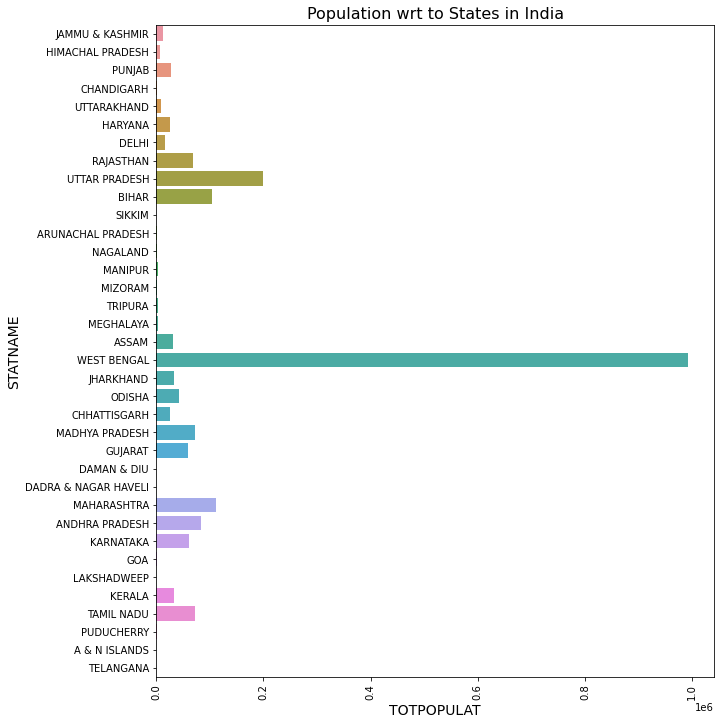

In [10]:
plt.figure(figsize=(10,12))
plt.xticks(rotation='vertical')
plt.xlabel('Population', fontsize=14)
plt.ylabel('States In India', fontsize=14)
plt.title("Population wrt to States in India", fontsize=16)
sns.barplot(df['TOTPOPULAT'],df['STATNAME'])
plt.show()

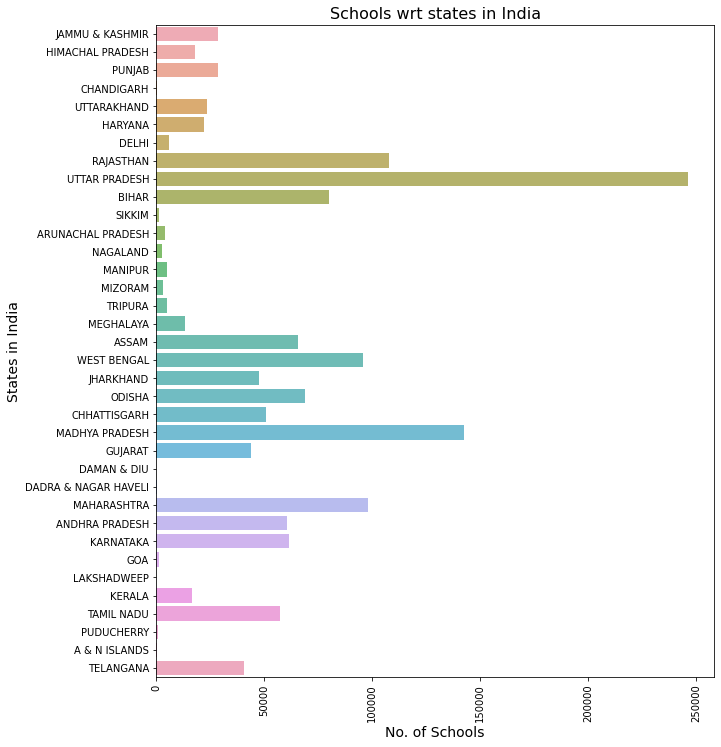

In [11]:
plt.figure(figsize=(10,12))
sns.barplot( df['SCHTOT'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('No. of Schools', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Schools wrt states in India", fontsize=16)
plt.show()

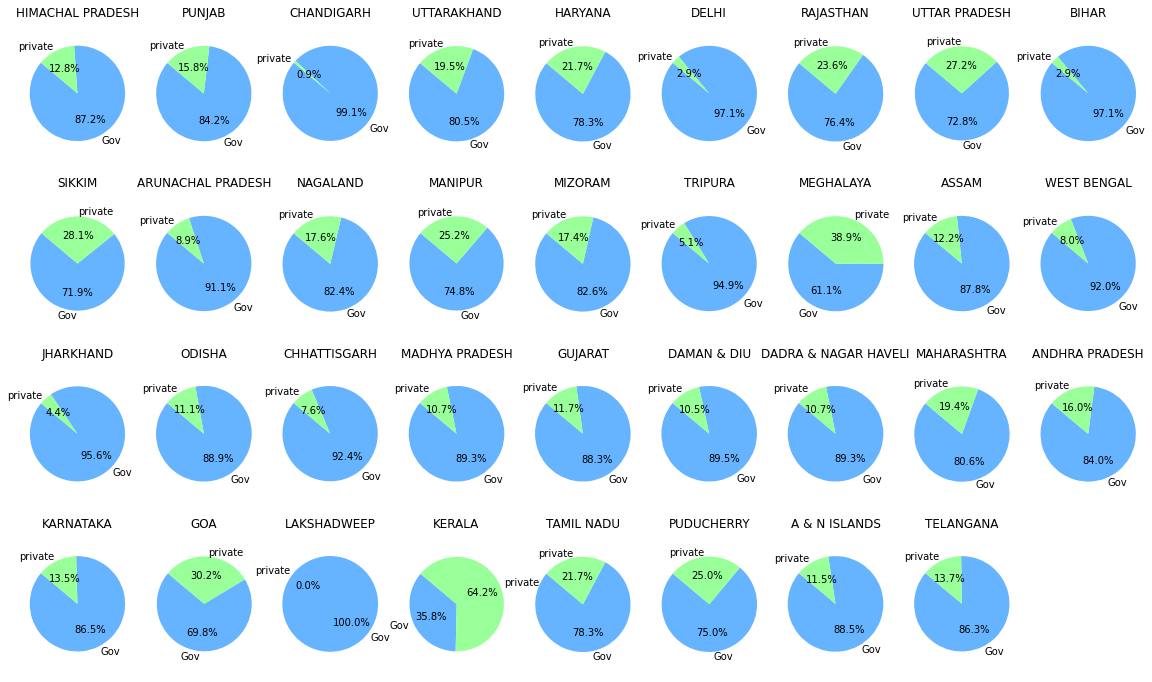

In [12]:
plt.figure(figsize=(20,12))
for i in range(1,len(df)):
    plt.subplot(4,9,i)
    colors=['#66b3ff','#99ff99']
    plt.title(df['STATNAME'][i])
    top = ['Gov','private']
    uttar = df.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float(uttar['SCHTOTG']/uttar['SCHTOT'])*100,float(uttar['SCHTOTPR']/uttar['SCHTOT'])*100]
    plt.pie(value, labels=top, autopct='%1.1f%%',startangle=140,colors=colors)
    plt.axis('equal')
plt.show()

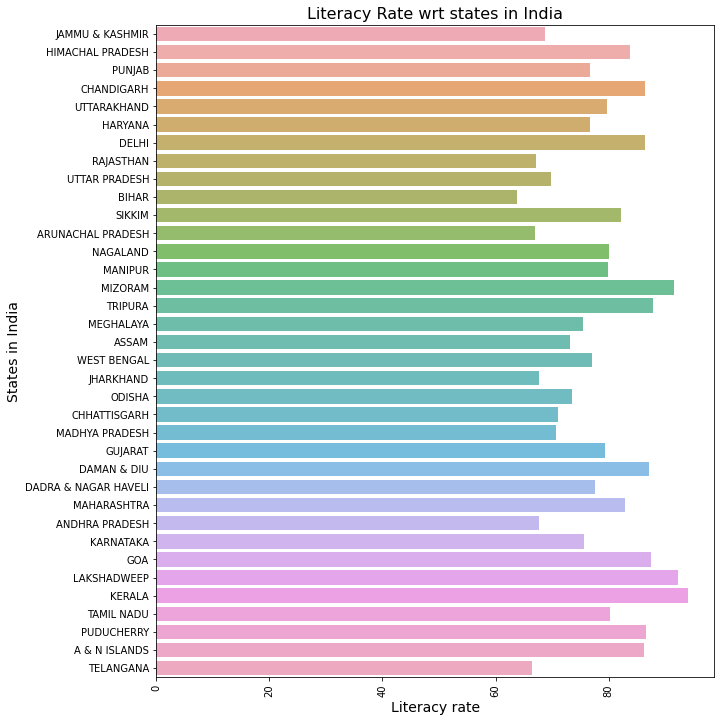

In [13]:
plt.figure(figsize=(10,12))
sns.barplot( df['OVERALL_LI'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Literacy rate', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Literacy Rate wrt states in India", fontsize=16)
plt.show()

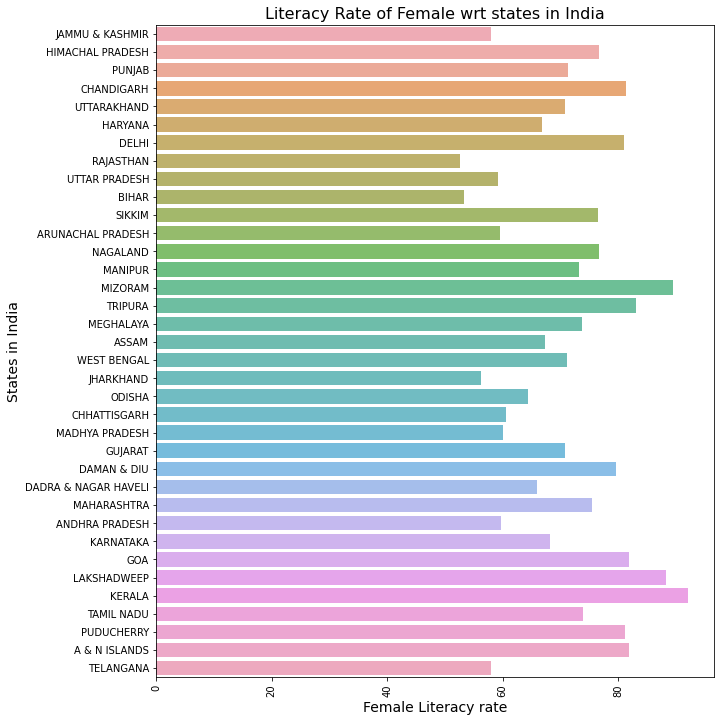

In [14]:
plt.figure(figsize=(10,12))
sns.barplot( df['FEMALE_LIT'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Female Literacy rate', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Literacy Rate of Female wrt states in India", fontsize=16)
plt.show()

In [15]:
df.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,1436,2127,...,0,0,0,0,0,0,665604,61070,167781,486933,44904,123864,321576,34985,65079,229227,25588,47051,1933,1428,3361,816,530,1346,75,22,97,915,61,2173,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,610,793,...,0,0,0,0,0,0,329673,122825,20439,319435,119118,19561,300370,113339,22577,332815,116201,23289,1316,918,2234,85,94,179,14,14,28,521,386,442,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14371,2582,2593,2864,1754,2743,1869,0,28776,13250,328,309,2858,1631,283,1829,0,20488,921,1916,...,389,0,0,0,89,0,1168711,755477,1043,1002514,717693,983,911360,582104,1374,637313,450571,1091,2321,4034,6355,1479,2277,3756,260,455,715,3687,1241,3668,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,29,85,0,5,70,0,0,201,7,12,42,0,2,52,0,0,115,4,12,...,0,0,0,0,0,0,59945,6520,46,57242,6330,34,44236,6456,25,42094,6330,27,43,275,318,37,143,180,7,24,31,0,0,147,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15497,1584,487,3433,1600,164,895,0,23660,12599,17,46,2806,1245,9,783,0,17505,2654,1457,...,0,1304,0,0,0,0,477117,165623,13868,423433,158811,12398,313326,103971,10992,243224,85782,9204,2253,1220,3473,2263,1205,3468,798,360,1158,1945,786,1956,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [16]:
df.tail()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
31,2015-16,32,KERALA,14,166,1907,1375,33388,24.76,9.95,44.86,1084,9.1,1.5,93.91,91.98,96.02,38863,2586473,1618453,8428,3365,1415,655,1021,1203,371,0,16458,2628,813,415,58,402,203,54,0,4573,4882,1967,...,0,1327,0,0,0,0,1014144,130330,31413,493505,82087,22188,1121402,135303,29086,502401,78481,19936,405,1067,1472,189,476,665,103,174,277,944,558,2195,1418,3561,675,51419,43025,31335,5327,15449,17752,3936
32,2015-16,33,TAMIL NADU,30,413,19301,4092,72139,38.10,9.56,15.60,995,20.0,1.1,80.30,73.86,86.81,130058,5534978,3706996,35379,9609,2660,124,4181,1791,3795,0,57539,24218,7464,329,72,2815,282,3020,0,38200,11046,2091,...,6761,177,0,1572,0,2589,2696138,878508,76924,2234551,761872,71729,2182053,663206,43164,1295291,453057,31179,3924,6018,9942,417,1171,1588,66,123,189,7198,2523,8690,6594,37034,4699,158846,77998,59873,490,30542,25761,15126
33,2015-16,34,PUDUCHERRY,4,6,145,33,1244,52.12,10.25,27.72,1038,15.7,0.0,86.55,81.22,92.12,479,122695,75174,278,86,100,1,52,166,36,0,719,239,48,5,1,52,40,36,0,421,39,38,...,0,0,67,48,57,12,38078,10117,38,26494,8473,38,40962,10336,1,30663,8887,1,192,210,402,156,118,274,0,0,0,19,2,128,87,0,0,1400,796,2015,12,296,1765,194
34,2015-16,35,A & N ISLANDS,3,9,198,37,380,30.58,10.40,6.68,878,0.0,7.5,86.27,81.84,90.11,8249,35315,22232,218,84,40,0,19,49,0,0,410,185,61,32,0,19,43,0,0,340,33,23,...,114,318,0,18,122,0,19689,0,2501,16530,0,2283,14936,56,1344,11574,56,1169,108,102,210,81,68,149,0,2,2,4,0,38,22,945,126,895,723,569,0,106,462,0
35,2015-16,36,TELANGANA,10,459,9934,1776,352,38.67,39.20,13.58,987,15.4,9.3,66.46,57.92,74.95,114840,3151811,1966365,21948,7189,155,0,193,4810,6523,0,40818,19689,3341,128,0,191,332,4998,0,28679,1890,3657,...,1263,0,0,0,0,460,1390796,339644,281789,1342455,334192,271884,1017230,243258,156716,878441,209790,138457,1999,1536,3535,176,528,704,64,268,332,6624,1677,6787,4823,18295,4418,76082,52862,1982,0,1165,49790,37117


In [17]:
df=df.drop(['AC_YEAR','STATCD'],axis=1)

In [18]:
df.head()

,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,1436,2127,388,0,...,0,0,0,0,0,0,665604,61070,167781,486933,44904,123864,321576,34985,65079,229227,25588,47051,1933,1428,3361,816,530,1346,75,22,97,915,61,2173,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,610,793,541,1,...,0,0,0,0,0,0,329673,122825,20439,319435,119118,19561,300370,113339,22577,332815,116201,23289,1316,918,2234,85,94,179,14,14,28,521,386,442,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,PUNJAB,22,146,13197,1780,27704,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14371,2582,2593,2864,1754,2743,1869,0,28776,13250,328,309,2858,1631,283,1829,0,20488,921,1916,2039,6,...,389,0,0,0,89,0,1168711,755477,1043,1002514,717693,983,911360,582104,1374,637313,450571,1091,2321,4034,6355,1479,2277,3756,260,455,715,3687,1241,3668,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,CHANDIGARH,1,20,84,20,1055,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,29,85,0,5,70,0,0,201,7,12,42,0,2,52,0,0,115,4,12,43,0,...,0,0,0,0,0,0,59945,6520,46,57242,6330,34,44236,6456,25,42094,6330,27,43,275,318,37,143,180,7,24,31,0,0,147,117,1994,218,135,419,2066,0,36,1398,0
4,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15497,1584,487,3433,1600,164,895,0,23660,12599,17,46,2806,1245,9,783,0,17505,2654,1457,441,618,...,0,1304,0,0,0,0,477117,165623,13868,423433,158811,12398,313326,103971,10992,243224,85782,9204,2253,1220,3473,2263,1205,3468,798,360,1158,1945,786,1956,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['STATNAME'])
le.transform(df['STATNAME'])
df['STATNAME']=le.transform(df['STATNAME'])

In [20]:
df.head()

,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,14,22,201,7263,1628,12549,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,1436,2127,388,0,...,0,0,0,0,0,0,665604,61070,167781,486933,44904,123864,321576,34985,65079,229227,25588,47051,1933,1428,3361,816,530,1346,75,22,97,915,61,2173,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,13,12,124,10120,2243,6857,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,610,793,541,1,...,0,0,0,0,0,0,329673,122825,20439,319435,119118,19561,300370,113339,22577,332815,116201,23289,1316,918,2234,85,94,179,14,14,28,521,386,442,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,27,22,146,13197,1780,27704,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14371,2582,2593,2864,1754,2743,1869,0,28776,13250,328,309,2858,1631,283,1829,0,20488,921,1916,2039,6,...,389,0,0,0,89,0,1168711,755477,1043,1002514,717693,983,911360,582104,1374,637313,450571,1091,2321,4034,6355,1479,2277,3756,260,455,715,3687,1241,3668,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,5,1,20,84,20,1055,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,29,85,0,5,70,0,0,201,7,12,42,0,2,52,0,0,115,4,12,43,0,...,0,0,0,0,0,0,59945,6520,46,57242,6330,34,44236,6456,25,42094,6330,27,43,275,318,37,143,180,7,24,31,0,0,147,117,1994,218,135,419,2066,0,36,1398,0
4,34,13,95,11989,995,10117,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15497,1584,487,3433,1600,164,895,0,23660,12599,17,46,2806,1245,9,783,0,17505,2654,1457,441,618,...,0,1304,0,0,0,0,477117,165623,13868,423433,158811,12398,313326,103971,10992,243224,85782,9204,2253,1220,3473,2263,1205,3468,798,360,1158,1945,786,1956,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [21]:
X = df.drop(['OVERALL_LI'], axis= 1)
y = df["OVERALL_LI"]

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)

In [23]:
X_train.shape

(32, 813)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
from sklearn.metrics import r2_score
y_pred3 = rf_model.predict(X_test)
print(f'R2 score is {r2_score(y_pred3,y_test)}')

R2 score is 0.8079274101134348
